In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv('company-stock-movements-2010-2015-incl.csv')

In [3]:
df.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [4]:
companies = df['Unnamed: 0'].to_list()

In [5]:
companies

['Apple',
 'AIG',
 'Amazon',
 'American express',
 'Boeing',
 'Bank of America',
 'British American Tobacco',
 'Canon',
 'Caterpillar',
 'Colgate-Palmolive',
 'ConocoPhillips',
 'Cisco',
 'Chevron',
 'DuPont de Nemours',
 'Dell',
 'Ford',
 'General Electrics',
 'Google/Alphabet',
 'Goldman Sachs',
 'GlaxoSmithKline',
 'Home Depot',
 'Honda',
 'HP',
 'IBM',
 'Intel',
 'Johnson & Johnson',
 'JPMorgan Chase',
 'Kimberly-Clark',
 'Coca Cola',
 'Lookheed Martin',
 'MasterCard',
 'McDonalds',
 '3M',
 'Microsoft',
 'Mitsubishi',
 'Navistar',
 'Northrop Grumman',
 'Novartis',
 'Pepsi',
 'Pfizer',
 'Procter Gamble',
 'Philip Morris',
 'Royal Dutch Shell',
 'SAP',
 'Schlumberger',
 'Sony',
 'Sanofi-Aventis',
 'Symantec',
 'Toyota',
 'Total',
 'Taiwan Semiconductor Manufacturing',
 'Texas instruments',
 'Unilever',
 'Valero Energy',
 'Walgreen',
 'Wells Fargo',
 'Wal-Mart',
 'Exxon',
 'Xerox',
 'Yahoo']

In [6]:
companies_movements = df.drop(columns=['Unnamed: 0']).to_numpy()

In [7]:
normalized = companies_movements.reshape((-1,1,107))

In [8]:
normalized_2d= normalized.reshape(-1,2)

In [9]:
normalized_2d

array([[ 0.58    , -0.220005],
       [-3.409998, -1.17    ],
       [ 1.680011, -2.689994],
       ...,
       [-0.300003, -0.66    ],
       [-0.079998, -0.060001],
       [ 0.259998,  0.099998]])

In [10]:
from sklearn.preprocessing import Normalizer


In [11]:
transformer = Normalizer().fit(normalized_2d) 

In [15]:
normalized_mov = transformer.transform(normalized_2d)

In [16]:
normalized_mov 

array([[ 0.93499485, -0.35466128],
       [-0.94587292, -0.32453723],
       [ 0.52971883, -0.84817331],
       ...,
       [-0.41380637, -0.91036492],
       [-0.799988  , -0.600016  ],
       [ 0.93334709,  0.35897523]])

In [17]:
model = TSNE(learning_rate=50)

In [18]:
tsne_features = model.fit_transform(normalized_mov)

In [20]:
tsne_features

array([[-16.409285 ,   2.9169915],
       [-43.190327 ,  -8.6242075],
       [ -1.7240802,  30.777428 ],
       ...,
       [ 29.121527 ,  41.553867 ],
       [-32.851154 ,   2.6372225],
       [ 13.305597 , -12.366802 ]], dtype=float32)

In [22]:
tsne_features_df = pd.DataFrame(tsne_features)

In [23]:
tsne_features_df

,0,1
0,-16.409285,2.916991
1,-43.190327,-8.624207
2,-1.724080,30.777428
3,-0.102536,-38.227676
4,6.589808,-21.731493
...,...,...
28885,-43.500687,9.359430
28886,-0.449709,-27.915413
28887,29.121527,41.553867
28888,-32.851154,2.637223


Features from array 


In [24]:
ys = tsne_features[:,1]

In [25]:
xs = tsne_features[:,0]

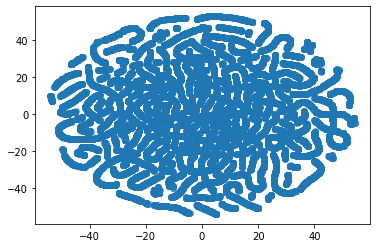

In [26]:
plt.scatter(xs, ys, alpha=0.5)

In [27]:
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)